In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
import pycaret
%matplotlib inline

In [2]:
import openpyxl

In [3]:
# Suponiendo que "liga_esp" es tu DataFrame
#ligas_interes = ['RUS', 'GER']

In [4]:
BANK=68

In [5]:
#importar datos

df_ligas = pd.read_excel("ligas_NUEVASconsolidadas.xlsx")

liga_esp = df_ligas[df_ligas['LIGA'] == 'POR']


In [6]:
liga_esp.columns

Index(['num_partido', 'LIGA', 'CASA', 'VISITA', 'c', 'v', 'resultado'], dtype='object')

In [7]:
display(liga_esp)

,num_partido,LIGA,CASA,VISITA,c,v,resultado
6965,6966,POR,Sporting Braga,FamalicÃ£o,1,2,2.0
6966,6967,POR,Gil Vicente,Portimonense,5,0,1.0
6967,6968,POR,Farense,Casa Pia AC,0,3,2.0
6968,6969,POR,Sporting CP,Vizela,3,2,1.0
6969,6970,POR,Rio Ave,Chaves,2,0,1.0
...,...,...,...,...,...,...,...
8808,8979,POR,Farense,VitÃ³ria GuimarÃ£es,2,2,0.5
8809,8980,POR,Rio Ave,Nacional,2,1,1.0
8810,8981,POR,Sporting Braga,Casa Pia AC,1,2,2.0
8811,8982,POR,Sporting CP,Benfica,1,0,1.0


In [8]:
liga_esp["CASA"] = liga_esp["CASA"].str.replace(" ", "")
liga_esp["VISITA"] = liga_esp["VISITA"].str.replace(" ", "")

In [9]:
liga_esp.rename(columns = {'CASA5':'CASA', 'VISITA6':'VISITA'}, inplace = True)
liga_esp.head()

,num_partido,LIGA,CASA,VISITA,c,v,resultado
6965,6966,POR,SportingBraga,FamalicÃ£o,1,2,2.0
6966,6967,POR,GilVicente,Portimonense,5,0,1.0
6967,6968,POR,Farense,CasaPiaAC,0,3,2.0
6968,6969,POR,SportingCP,Vizela,3,2,1.0
6969,6970,POR,RioAve,Chaves,2,0,1.0


In [10]:
liga_espcasa = liga_esp.groupby('CASA')[['c', 'v']].mean()

liga_espvisita= liga_esp.groupby('VISITA')[['v', 'c']].mean()

In [11]:
liga_espcasa.rename(columns = {'c':'GFc', 'v':'GCc'}, inplace = True)
liga_espvisita.rename(columns = {'v':'GFv', 'c':'GCv'}, inplace = True)

In [12]:
liga_espcasa_visita = liga_espcasa.merge(liga_espvisita, left_index=True, right_index=True)
liga_espcasa_visita

,GFc,GCc,GFv,GCv
CASA,,,,
AVSFutevol,0.666667,1.833333,0.400000,1.000000
AVSfutevol,1.000000,0.333333,1.500000,3.000000
Arouca,1.240000,1.440000,1.333333,1.625000
Benfica,2.960000,0.400000,1.583333,1.125000
Boavista,0.916667,1.625000,1.038462,1.769231
CDSantaClara,1.000000,0.857143,1.250000,1.250000
CasaPiaAC,0.800000,1.040000,1.440000,1.720000
Chaves,1.235294,2.176471,0.588235,2.058824
Estoril,1.346154,1.192308,1.166667,2.208333


In [13]:
# Guarda el DataFrame en un archivo Excel
liga_espcasa_visita.to_excel('liga_espcasa_visita.xlsx', index=True)

In [14]:
promedioc=liga_esp[['c','v']].mean().mean()
promediov=liga_esp['v'].mean()
print('promedioc:',promedioc)
print('promediov:',promediov)
ventaja_casa= promedioc-promediov
print('ventaja casa:', ventaja_casa)

promedioc: 1.3822869955156951
promediov: 1.2264573991031391
ventaja casa: 0.155829596412556


In [ ]:
liga_espcasa_visita['PAc']=liga_espcasa_visita['GFc']/promedioc
liga_espcasa_visita['PDc']=liga_espcasa_visita['GCc']/promediov
liga_espcasa_visita['PAv']=liga_espcasa_visita['GFv']/promediov
liga_espcasa_visita['PDv']=liga_espcasa_visita['GCv']/promedioc

# Show the first few rows
print(liga_espcasa_visita.head())


                 GFc       GCc       GFv       GCv       PAc       PDc  \
CASA                                                                     
AVSFutevol  0.666667  1.833333  0.400000  1.000000  0.482293  1.494820   
AVSfutevol  1.000000  0.333333  1.500000  3.000000  0.723439  0.271785   
Arouca      1.240000  1.440000  1.333333  1.625000  0.897064  1.174113   
Benfica     2.960000  0.400000  1.583333  1.125000  2.141379  0.326143   
Boavista    0.916667  1.625000  1.038462  1.769231  0.663152  1.324954   

                 PAv       PDv  
CASA                            
AVSFutevol  0.326143  0.723439  
AVSfutevol  1.223035  2.170316  
Arouca      1.087142  1.175588  
Benfica     1.290981  0.813869  
Boavista    0.846716  1.279930  


In [16]:
# Guarda el DataFrame en un archivo Excel
#liga_espcasa_visita.to_excel('liga_espcasa_visita.xlsx', index=True)

In [17]:
print(liga_esp.columns)
print(liga_espcasa_visita.columns)

Index(['num_partido', 'LIGA', 'CASA', 'VISITA', 'c', 'v', 'resultado'], dtype='object')
Index(['GFc', 'GCc', 'GFv', 'GCv', 'PAc', 'PDc', 'PAv', 'PDv'], dtype='object')


In [18]:
tabla_completa = pd.merge(liga_esp, liga_espcasa_visita[['GFc','PAc','PDc']], left_on='CASA', right_index=True)

tabla_completa

,num_partido,LIGA,CASA,VISITA,c,v,resultado,GFc,PAc,PDc
6965,6966,POR,SportingBraga,FamalicÃ£o,1,2,2.0,1.961538,1.419053,1.097595
7000,7001,POR,SportingBraga,SportingCP,1,1,0.5,1.961538,1.419053,1.097595
7017,7018,POR,SportingBraga,Boavista,4,1,1.0,1.961538,1.419053,1.097595
7031,7032,POR,SportingBraga,RioAve,2,1,1.0,1.961538,1.419053,1.097595
7049,7050,POR,SportingBraga,Portimonense,6,1,1.0,1.961538,1.419053,1.097595
...,...,...,...,...,...,...,...,...,...,...
8177,8348,POR,AVSFutevol,Porto,0,5,2.0,0.666667,0.482293,1.494820
8185,8356,POR,AVSFutevol,FamalicÃ£o,2,3,2.0,0.666667,0.482293,1.494820
8515,8686,POR,AVSFutevol,SportingBraga,0,1,2.0,0.666667,0.482293,1.494820
8790,8961,POR,AVSFutevol,Benfica,1,1,0.5,0.666667,0.482293,1.494820


In [19]:
tabla_completa = pd.merge(tabla_completa, liga_espcasa_visita[['GFv','PAv','PDv']], left_on='VISITA', right_index= True)
tabla_completa

,num_partido,LIGA,CASA,VISITA,c,v,resultado,GFc,PAc,PDc,GFv,PAv,PDv
6965,6966,POR,SportingBraga,FamalicÃ£o,1,2,2.0,1.961538,1.419053,1.097595,1.166667,0.951249,0.904298
8792,8963,POR,SportingBraga,FamalicÃ£o,3,3,0.5,1.961538,1.419053,1.097595,1.166667,0.951249,0.904298
7199,7200,POR,GilVicente,FamalicÃ£o,1,2,2.0,1.625000,1.175588,0.951249,1.166667,0.951249,0.904298
7146,7147,POR,Farense,FamalicÃ£o,1,1,0.5,1.200000,0.868127,1.174113,1.166667,0.951249,0.904298
6989,6990,POR,SportingCP,FamalicÃ£o,1,0,1.0,3.040000,2.199254,0.521828,1.166667,0.951249,0.904298
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7290,7461,POR,CasaPiaAC,CDSantaClara,0,2,2.0,0.800000,0.578751,0.847971,1.250000,1.019196,0.904298
7310,7481,POR,Benfica,CDSantaClara,4,1,1.0,2.960000,2.141379,0.326143,1.250000,1.019196,0.904298
7275,7446,POR,Estoril,CDSantaClara,1,4,2.0,1.346154,0.973860,0.972156,1.250000,1.019196,0.904298
8812,8983,POR,FamalicÃ£o,CDSantaClara,1,2,2.0,1.076923,0.779088,0.940796,1.250000,1.019196,0.904298


In [20]:
tabla_completa['gc']=tabla_completa['GFc']*(((tabla_completa['PAc'])*(tabla_completa['PDv'])))+ventaja_casa
tabla_completa['gv']=tabla_completa['GFv']*(((tabla_completa['PAv'])*(tabla_completa['PDc'])))
tabla_completa = tabla_completa.sort_values(by="num_partido")

tabla_completa[0:10]

,num_partido,LIGA,CASA,VISITA,c,v,resultado,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv
6965,6966,POR,SportingBraga,FamalicÃ£o,1,2,2.0,1.961538,1.419053,1.097595,1.166667,0.951249,0.904298,2.672969,1.218101
6966,6967,POR,GilVicente,Portimonense,5,0,1.0,1.625000,1.175588,0.951249,1.235294,1.007205,1.744764,3.488906,1.183539
6967,6968,POR,Farense,CasaPiaAC,0,3,2.0,1.200000,0.868127,1.174113,1.440000,1.174113,1.244315,1.452097,1.985101
6968,6969,POR,SportingCP,Vizela,3,2,1.0,3.040000,2.199254,0.521828,0.941176,0.767394,1.446878,9.829265,0.376892
6969,6970,POR,RioAve,Chaves,2,0,1.0,1.560000,1.128564,0.978428,0.588235,0.479621,1.489433,2.778066,0.276044
6970,6971,POR,EstreladaAmadora,VitÃ³riaGuimarÃ£es,0,1,2.0,1.260870,0.912162,1.276210,1.240000,1.011042,0.839189,1.120995,1.599975
6971,6972,POR,Arouca,Estoril,4,3,1.0,1.240000,0.897064,1.174113,1.166667,0.951249,1.597594,1.932928,1.303020
6972,6973,POR,Moreirense,Porto,1,2,2.0,1.250000,0.904298,0.883303,1.791667,1.460847,0.633009,0.871366,2.311914
6973,6974,POR,Boavista,Benfica,3,2,1.0,0.916667,0.663152,1.324954,1.583333,1.290981,0.813869,0.650572,2.708277
6974,6975,POR,CasaPiaAC,SportingCP,1,2,2.0,0.800000,0.578751,0.847971,2.560000,2.087313,0.665564,0.463986,4.531149


In [21]:
import numpy as np
from scipy.optimize import curve_fit

# Definir una función lineal
def funcion_lineal(x, m, b):
    return m * x + b

# Ajustar la función lineal para 'gc' y 'c'
parametros_gc, covarianza_gc = curve_fit(funcion_lineal, tabla_completa['c'], tabla_completa['gc'])

# Ajustar la función lineal para 'gv' y 'v'
parametros_gv, covarianza_gv = curve_fit(funcion_lineal, tabla_completa['v'], tabla_completa['gv'])

# Imprimir los parámetros encontrados
print("Parámetros ajustados para 'gc' y 'c':", parametros_gc)
print("Parámetros ajustados para 'gv' y 'v':", parametros_gv)

Parámetros ajustados para 'gc' y 'c': [0.84147856 1.12823902]
Parámetros ajustados para 'gv' y 'v': [0.62005596 0.69854377]


In [ ]:
# Sustituir los valores en la columna 'gc' con los valores ajustados
tabla_completa['gc'] = funcion_lineal(tabla_completa['c'], *parametros_gc)

# Sustituir los valores en la columna 'gv' con los valores ajustados
tabla_completa['gv'] = funcion_lineal(tabla_completa['v'], *parametros_gv)

tabla_completa

,num_partido,LIGA,CASA,VISITA,c,v,resultado,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv
6965,6966,POR,SportingBraga,FamalicÃ£o,1,2,2.0,1.961538,1.419053,1.097595,1.166667,0.951249,0.904298,1.969718,1.938656
6966,6967,POR,GilVicente,Portimonense,5,0,1.0,1.625000,1.175588,0.951249,1.235294,1.007205,1.744764,5.335632,0.698544
6967,6968,POR,Farense,CasaPiaAC,0,3,2.0,1.200000,0.868127,1.174113,1.440000,1.174113,1.244315,1.128239,2.558712
6968,6969,POR,SportingCP,Vizela,3,2,1.0,3.040000,2.199254,0.521828,0.941176,0.767394,1.446878,3.652675,1.938656
6969,6970,POR,RioAve,Chaves,2,0,1.0,1.560000,1.128564,0.978428,0.588235,0.479621,1.489433,2.811196,0.698544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8808,8979,POR,Farense,VitÃ³riaGuimarÃ£es,2,2,0.5,1.200000,0.868127,1.174113,1.240000,1.011042,0.839189,2.811196,1.938656
8809,8980,POR,RioAve,Nacional,2,1,1.0,1.560000,1.128564,0.978428,0.625000,0.509598,0.904298,2.811196,1.318600
8810,8981,POR,SportingBraga,CasaPiaAC,1,2,2.0,1.961538,1.419053,1.097595,1.440000,1.174113,1.244315,1.969718,1.938656
8811,8982,POR,SportingCP,Benfica,1,0,1.0,3.040000,2.199254,0.521828,1.583333,1.290981,0.813869,1.969718,0.698544


import pandas as pd
from sklearn.linear_model import LinearRegression

# Supongo que tienes el DataFrame tabla_completa ya creado y con las columnas 'GFc', 'GCc', 'GFv', 'GCv', 'gc', 'gv'

# Crear modelos de regresión lineal para gc y gv
modelo_gc = LinearRegression()
X_gc = tabla_completa[['PAc','PDv']]
y_gc = tabla_completa['gc']
modelo_gc.fit(X_gc, y_gc)

modelo_gv = LinearRegression()
X_gv = tabla_completa[['PAv','PDc']]
y_gv = tabla_completa['gv']
modelo_gv.fit(X_gv, y_gv)

# Predecir nuevos valores de gc y gv
nuevos_datos1 = tabla_completa[['PAc', 'PDv']]
nuevos_datos2=tabla_completa[['PAv', 'PDc']]
nuevos_gc = modelo_gc.predict(nuevos_datos1)
nuevos_gv = modelo_gv.predict(nuevos_datos2)

# Actualizar los valores de gc y gv en el DataFrame
tabla_completa['gc'] = nuevos_gc
tabla_completa['gv'] = nuevos_gv

# Imprimir el DataFrame actualizado
tabla_completa

In [23]:
tabla_completa['win_pctC'] = tabla_completa['gc']/(tabla_completa['gc']+tabla_completa['gv'])
tabla_completa['resultado'] = tabla_completa['resultado'].replace(0.50, 0)
tabla_completa

,num_partido,LIGA,CASA,VISITA,c,v,resultado,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv,win_pctC
6965,6966,POR,SportingBraga,FamalicÃ£o,1,2,2.0,1.961538,1.419053,1.097595,1.166667,0.951249,0.904298,1.969718,1.938656,0.503974
6966,6967,POR,GilVicente,Portimonense,5,0,1.0,1.625000,1.175588,0.951249,1.235294,1.007205,1.744764,5.335632,0.698544,0.884235
6967,6968,POR,Farense,CasaPiaAC,0,3,2.0,1.200000,0.868127,1.174113,1.440000,1.174113,1.244315,1.128239,2.558712,0.306009
6968,6969,POR,SportingCP,Vizela,3,2,1.0,3.040000,2.199254,0.521828,0.941176,0.767394,1.446878,3.652675,1.938656,0.653275
6969,6970,POR,RioAve,Chaves,2,0,1.0,1.560000,1.128564,0.978428,0.588235,0.479621,1.489433,2.811196,0.698544,0.800970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8808,8979,POR,Farense,VitÃ³riaGuimarÃ£es,2,2,0.0,1.200000,0.868127,1.174113,1.240000,1.011042,0.839189,2.811196,1.938656,0.591849
8809,8980,POR,RioAve,Nacional,2,1,1.0,1.560000,1.128564,0.978428,0.625000,0.509598,0.904298,2.811196,1.318600,0.680711
8810,8981,POR,SportingBraga,CasaPiaAC,1,2,2.0,1.961538,1.419053,1.097595,1.440000,1.174113,1.244315,1.969718,1.938656,0.503974
8811,8982,POR,SportingCP,Benfica,1,0,1.0,3.040000,2.199254,0.521828,1.583333,1.290981,0.813869,1.969718,0.698544,0.738203


In [24]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Función para calcular la predicción basada en los umbrales que estamos optimizando
def calcular_prediccion(tabla_completa, umbral_pctC, umbral_gc_gv):
    tabla_completa['WINPCTC_prediccion'] = np.where(
        tabla_completa['win_pctC'] > umbral_pctC, 1,
        np.where(abs(abs(tabla_completa['gc']) - abs(tabla_completa['gv'])) < umbral_gc_gv, 0, 2)
    )
    return tabla_completa['WINPCTC_prediccion']

# Función objetivo que queremos minimizar, con ponderaciones
def funcion_objetivo(x, tabla_completa):
    umbral_pctC, umbral_gc_gv = x
    
    # Calcular predicción con los umbrales actuales
    predicciones = calcular_prediccion(tabla_completa.copy(), umbral_pctC, umbral_gc_gv)
    
    # Calcular las frecuencias para prediccion y resultado
    conteo_prediccion = predicciones.value_counts().sort_index()
    conteo_resultado = tabla_completa['resultado'].value_counts().sort_index()
    
    # Ajustar tamaños para que tengan el mismo índice
    conteo_prediccion, conteo_resultado = conteo_prediccion.align(conteo_resultado, fill_value=0)
    
    # Definir los pesos por categoría (prioridad: 1 > 2 > 0)
    pesos = pd.Series([3, 1, 2], index=[0, 1, 2])  # Más peso a la categoría 1
    
    # Calcular la diferencia ponderada
    diferencia = np.abs(conteo_prediccion - conteo_resultado) * pesos
    
    return diferencia.sum()

# Valores iniciales para los umbrales
x0 = [0.5, 0.5]  # [umbral_pctC, umbral_gc_gv]

# Optimización usando 'minimize' para encontrar los mejores umbrales
resultado_opt = minimize(funcion_objetivo, x0, args=(tabla_completa,), method='Nelder-Mead')

# Obtener los valores óptimos de los umbrales
umbral_pctC_opt, umbral_gc_gv_opt = resultado_opt.x

# Imprimir los umbrales óptimos
print(f"Umbral óptimo para 'win_pctC': {umbral_pctC_opt}")
print(f"Umbral óptimo para 'gc - gv': {umbral_gc_gv_opt}")

# Aplicar los umbrales óptimos a la tabla_completa
tabla_completa['WINPCTC_prediccion'] = calcular_prediccion(tabla_completa, umbral_pctC_opt, umbral_gc_gv_opt)

# Mostrar los primeros 10 registros
print(tabla_completa.head(10))

# Mostrar los conteos de las agrupaciones finales
print("Distribución de predicciones:")
print(tabla_completa.groupby('WINPCTC_prediccion').size())

print("Distribución de resultados:")
print(tabla_completa.groupby('resultado').size())


Umbral óptimo para 'win_pctC': 0.5499999999999998
Umbral óptimo para 'gc - gv': 0.475
      num_partido LIGA              CASA              VISITA  c  v  resultado  \
6965         6966  POR     SportingBraga          FamalicÃ£o  1  2        2.0   
6966         6967  POR        GilVicente        Portimonense  5  0        1.0   
6967         6968  POR           Farense           CasaPiaAC  0  3        2.0   
6968         6969  POR        SportingCP              Vizela  3  2        1.0   
6969         6970  POR            RioAve              Chaves  2  0        1.0   
6970         6971  POR  EstreladaAmadora  VitÃ³riaGuimarÃ£es  0  1        2.0   
6971         6972  POR            Arouca             Estoril  4  3        1.0   
6972         6973  POR        Moreirense               Porto  1  2        2.0   
6973         6974  POR          Boavista             Benfica  3  2        1.0   
6974         6975  POR         CasaPiaAC          SportingCP  1  2        2.0   

           GFc       P

In [25]:
from scipy.stats import poisson

# Valores esperados de los equipos
lambda1 = tabla_completa['gc']
lambda2 = tabla_completa['gv']

# Generación de la matriz de probabilidades de Poisson
matriz_poisson = [[poisson.pmf(i, lambda1) * poisson.pmf(j, lambda2) for j in range(0, 10)] for i in range(0, 10)]

In [26]:
# Definir función para calcular la probabilidad Poisson
def poisson_prob(k, lamb):
    return (lamb ** k) * np.exp(-lamb) / np.math.factorial(k)

# Iterar sobre las filas de la tabla pronosticook y calcular las probabilidades
for index, row in tabla_completa.iterrows():
    lambda_local = row['gc']
    lambda_visitante = row['gv']
    tabla_completa.loc[index, 'prob_localpoisson'] = sum([poisson_prob(j, lambda_local) * poisson_prob(k, lambda_visitante) for j in range(0, 10) for k in range(0, j)])
    tabla_completa.loc[index, 'prob_empatepoisson'] = sum([poisson_prob(j, lambda_local) * poisson_prob(j, lambda_visitante) for j in range(0, 10)])
    tabla_completa.loc[index, 'prob_visitantepoisson'] = sum([poisson_prob(j, lambda_local) * poisson_prob(k, lambda_visitante) for j in range(0, 10) for k in range(j+1, 10)])
    if tabla_completa[['prob_localpoisson', 'prob_empatepoisson', 'prob_visitantepoisson']].idxmax(axis=1)[index] == 'prob_localpoisson':
        tabla_completa.loc[index, 'PROB'] = '1'
    elif tabla_completa[['prob_localpoisson', 'prob_empatepoisson', 'prob_visitantepoisson']].idxmax(axis=1)[index] == 'prob_visitantepoisson':
        tabla_completa.loc[index, 'PROB'] = '2'
    else:
        tabla_completa.loc[index, 'PROB'] = '0'

# Imprimir la tabla actualizada
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(tabla_completa.head())

,num_partido,LIGA,CASA,VISITA,c,v,resultado,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv,win_pctC,WINPCTC_prediccion,prob_localpoisson,prob_empatepoisson,prob_visitantepoisson,PROB
6965,6966,POR,SportingBraga,FamalicÃ£o,1,2,2.0,1.961538,1.419053,1.097595,1.166667,0.951249,0.904298,1.969718,1.938656,0.503974,0,0.401205,0.209619,0.389099,1
6966,6967,POR,GilVicente,Portimonense,5,0,1.0,1.625000,1.175588,0.951249,1.235294,1.007205,1.744764,5.335632,0.698544,0.884235,1,0.920700,0.024024,0.009582,1
6967,6968,POR,Farense,CasaPiaAC,0,3,2.0,1.200000,0.868127,1.174113,1.440000,1.174113,1.244315,1.128239,2.558712,0.306009,2,0.147642,0.169684,0.682342,2
6968,6969,POR,SportingCP,Vizela,3,2,1.0,3.040000,2.199254,0.521828,0.941176,0.767394,1.446878,3.652675,1.938656,0.653275,1,0.690752,0.135645,0.169123,1
6969,6970,POR,RioAve,Chaves,2,0,1.0,1.560000,1.128564,0.978428,0.588235,0.479621,1.489433,2.811196,0.698544,0.800970,1,0.808780,0.124587,0.065953,1


import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Simulación de datos para tabla_completa (asumiendo que tienes esta estructura)
# tabla_completa = pd.read_csv('tus_datos.csv')

# Función para calcular la predicción basada en los umbrales que estamos optimizando
def calcular_prediccion(tabla_completa, umbral_pctC, umbral_gc_gv):
    tabla_completa['prediccion'] = np.where(
        tabla_completa['win_pctC'] > umbral_pctC, 1,
        np.where(abs(abs(tabla_completa['gc']) - abs(tabla_completa['gv'])) < umbral_gc_gv, 0, 2)
    )
    return tabla_completa['prediccion']

# Función objetivo que queremos minimizar
def funcion_objetivo(x, tabla_completa):
    umbral_pctC, umbral_gc_gv = x
    
    # Calcular predicción con los umbrales actuales
    predicciones = calcular_prediccion(tabla_completa.copy(), umbral_pctC, umbral_gc_gv)
    
    # Calcular las frecuencias para prediccion y resultado
    conteo_prediccion = predicciones.value_counts().sort_index()
    conteo_resultado = tabla_completa['resultado'].value_counts().sort_index()
    
    # Ajustar tamaños para que tengan el mismo índice
    conteo_prediccion, conteo_resultado = conteo_prediccion.align(conteo_resultado, fill_value=0)
    
    # Calcular la diferencia absoluta entre los grupos de predicción y resultado
    diferencia = np.abs(conteo_prediccion - conteo_resultado).sum()
    
    return diferencia

# Valores iniciales para los umbrales
x0 = [0.5, 0.5]  # [umbral_pctC, umbral_gc_gv]

# Optimización usando 'minimize' para encontrar los mejores umbrales
resultado_opt = minimize(funcion_objetivo, x0, args=(tabla_completa,), method='Nelder-Mead')

# Obtener los valores óptimos de los umbrales
umbral_pctC_opt, umbral_gc_gv_opt = resultado_opt.x

# Imprimir los umbrales óptimos
print(f"Umbral óptimo para 'win_pctC': {umbral_pctC_opt}")
print(f"Umbral óptimo para 'gc - gv': {umbral_gc_gv_opt}")

# Aplicar los umbrales óptimos a la tabla_completa
tabla_completa['prediccion'] = calcular_prediccion(tabla_completa, umbral_pctC_opt, umbral_gc_gv_opt)

# Mostrar los primeros 10 registros
display(tabla_completa[0:10])

# Mostrar los conteos de las agrupaciones finales
print("Distribución de predicciones:")
print(tabla_completa.groupby('prediccion').size())

print("Distribución de resultados:")
print(tabla_completa.groupby('resultado').size())

tabla_completa['prediccion'] = np.where(tabla_completa['win_pctC'] >0.632, 1,
                                         np.where(abs(abs(tabla_completa['gc']) - abs(tabla_completa['gv'])) < 0.5748, 0, 2))

display(tabla_completa[0:10])

In [27]:
print(tabla_completa.groupby('PROB').size())

PROB
1    346
2    100
dtype: int64


In [28]:
print(tabla_completa.groupby('resultado').size())

resultado
0.0    112
1.0    199
2.0    135
dtype: int64


In [29]:
# Convertir las columnas a tipo numérico (float o int)
tabla_completa['PROB'] = pd.to_numeric(tabla_completa['PROB'], errors='coerce')
tabla_completa['resultado'] = pd.to_numeric(tabla_completa['resultado'], errors='coerce')

# Verificar los nuevos tipos de datos
print(tabla_completa[['PROB', 'resultado']].dtypes)

PROB           int64
resultado    float64
dtype: object


In [30]:
# Crear la columna 'acierto' donde PROB es igual a resultado
tabla_completa['acierto'] = (tabla_completa['PROB'] == tabla_completa['resultado']).astype(int)

# Calcular los porcentajes
porcentaje_aciertos_por_categoria = tabla_completa.groupby('resultado')['acierto'].mean() * 100
porcentaje_aciertos_global = tabla_completa['acierto'].mean() * 100

# Mostrar resultados
print("Porcentaje de aciertos por categoría:")
print(porcentaje_aciertos_por_categoria)
print("\nPorcentaje de aciertos global:")
print(f"{porcentaje_aciertos_global:.2f}%")

Porcentaje de aciertos por categoría:
resultado
0.0      0.000000
1.0    100.000000
2.0     74.074074
Name: acierto, dtype: float64

Porcentaje de aciertos global:
67.04%


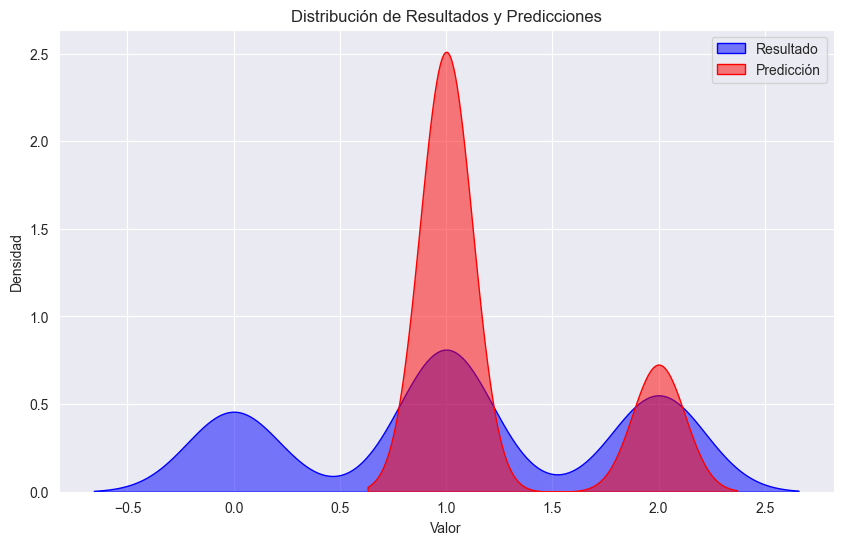

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
# Establecer el estilo de Seaborn
sns.set_style("darkgrid")

# Crear subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la distribución de 'resultado' y 'prediccion' con transparencia
sns.kdeplot(tabla_completa['resultado'], color='blue', label='Resultado', ax=ax, alpha=0.5, fill=True)
sns.kdeplot(tabla_completa['PROB'].astype(float), color='red', label='Predicción', ax=ax, alpha=0.5, fill=True)

# Configuración de leyendas y etiquetas
plt.title('Distribución de Resultados y Predicciones')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

In [32]:
# Eliminar las columnas 'c' y 'v' de tabla_completa
tabla_completa = tabla_completa.drop(['c', 'v', 'acierto'], axis=1)

# Imprimir el DataFrame resultante
print(tabla_completa)

      num_partido LIGA           CASA              VISITA  resultado  \
6965         6966  POR  SportingBraga          FamalicÃ£o        2.0   
6966         6967  POR     GilVicente        Portimonense        1.0   
6967         6968  POR        Farense           CasaPiaAC        2.0   
6968         6969  POR     SportingCP              Vizela        1.0   
6969         6970  POR         RioAve              Chaves        1.0   
...           ...  ...            ...                 ...        ...   
8808         8979  POR        Farense  VitÃ³riaGuimarÃ£es        0.0   
8809         8980  POR         RioAve            Nacional        1.0   
8810         8981  POR  SportingBraga           CasaPiaAC        2.0   
8811         8982  POR     SportingCP             Benfica        1.0   
8812         8983  POR     FamalicÃ£o        CDSantaClara        2.0   

           GFc       PAc       PDc       GFv       PAv       PDv        gc  \
6965  1.961538  1.419053  1.097595  1.166667  0.951249  0

In [33]:
print(tabla_completa.columns)

Index(['num_partido', 'LIGA', 'CASA', 'VISITA', 'resultado', 'GFc', 'PAc',
       'PDc', 'GFv', 'PAv', 'PDv', 'gc', 'gv', 'win_pctC',
       'WINPCTC_prediccion', 'prob_localpoisson', 'prob_empatepoisson',
       'prob_visitantepoisson', 'PROB'],
      dtype='object')


In [34]:
data= tabla_completa

In [35]:
from pycaret.classification import *
s = setup(data, target = 'resultado', session_id = 123)

,Description,Value
0,Session id,123
1,Target,resultado
2,Target type,Multiclass
3,Original data shape,"(446, 19)"
4,Transformed data shape,"(446, 61)"
5,Transformed train set shape,"(312, 61)"
6,Transformed test set shape,"(134, 61)"
7,Numeric features,15
8,Categorical features,3
9,Preprocess,True


In [36]:
best = compare_models()

In [37]:
boosted = ensemble_model(best, method = 'Bagging')

In [38]:
print(boosted)

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max

In [39]:
evaluate_model(boosted)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

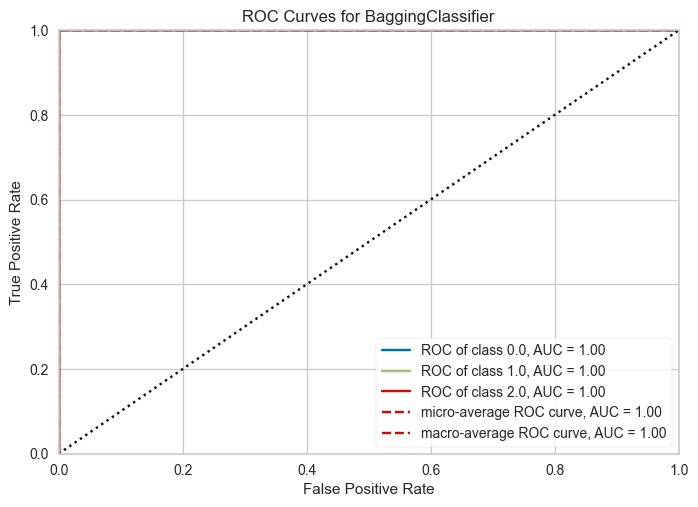

In [40]:
plot_model(boosted, plot = 'auc')

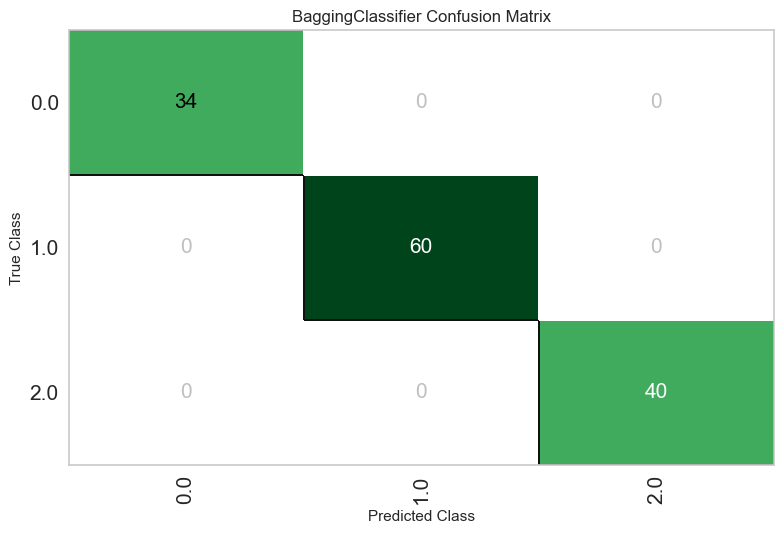

In [41]:
plot_model(boosted, plot = 'confusion_matrix')

In [42]:
predict_model(boosted)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,num_partido,LIGA,CASA,VISITA,GFc,PAc,PDc,GFv,PAv,PDv,...,gv,win_pctC,WINPCTC_prediccion,prob_localpoisson,prob_empatepoisson,prob_visitantepoisson,PROB,resultado,prediction_label,prediction_score
7211,7212,POR,SportingBraga,Arouca,1.961538,1.419053,1.097595,1.333333,1.087142,1.175588,...,2.558712,0.306009,2,0.147642,0.169684,0.682342,2,2.0,2,1.0
7298,7469,POR,Moreirense,Benfica,1.250000,0.904298,0.883303,1.583333,1.290981,0.813869,...,1.318600,0.599005,1,0.525929,0.218610,0.255419,1,0.0,0,1.0
7610,7781,POR,Moreirense,FamalicÃ£o,1.250000,0.904298,0.883303,1.166667,0.951249,0.904298,...,0.698544,0.617610,1,0.458119,0.315053,0.226827,1,0.0,0,1.0
8805,8976,POR,AVSFutevol,EstreladaAmadora,0.666667,0.482293,1.494820,0.560000,0.456600,1.186440,...,1.318600,0.599005,1,0.525929,0.218610,0.255419,1,0.0,0,1.0
7080,7081,POR,Estoril,Chaves,1.346154,0.973860,0.972156,0.588235,0.479621,1.489433,...,0.698544,0.865476,1,0.922128,0.042536,0.018379,1,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,7254,POR,Chaves,FamalicÃ£o,1.235294,0.893660,1.774599,1.166667,0.951249,0.904298,...,1.318600,0.461101,0,0.318308,0.271950,0.409740,2,2.0,2,1.0
7142,7143,POR,SportingBraga,Moreirense,1.961538,1.419053,1.097595,1.038462,0.846716,0.918211,...,0.698544,0.738203,1,0.673752,0.203135,0.123072,1,1.0,1,1.0
7134,7135,POR,RioAve,Estoril,1.560000,1.128564,0.978428,1.166667,0.951249,1.597594,...,1.318600,0.599005,1,0.525929,0.218610,0.255419,1,0.0,0,1.0
7050,7051,POR,CasaPiaAC,Vizela,0.800000,0.578751,0.847971,0.941176,0.767394,1.446877,...,1.318600,0.461101,0,0.318308,0.271950,0.409740,2,2.0,2,1.0


In [43]:
predictions = predict_model(boosted, data=data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,num_partido,LIGA,CASA,VISITA,GFc,PAc,PDc,GFv,PAv,PDv,...,gv,win_pctC,WINPCTC_prediccion,prob_localpoisson,prob_empatepoisson,prob_visitantepoisson,PROB,resultado,prediction_label,prediction_score
6965,6966,POR,SportingBraga,FamalicÃ£o,1.961538,1.419053,1.097595,1.166667,0.951249,0.904298,...,1.938656,0.503974,0,0.401205,0.209619,0.389099,1,2.0,2,1.0
6966,6967,POR,GilVicente,Portimonense,1.625000,1.175588,0.951249,1.235294,1.007205,1.744764,...,0.698544,0.884235,1,0.920700,0.024024,0.009582,1,1.0,1,1.0
6967,6968,POR,Farense,CasaPiaAC,1.200000,0.868127,1.174113,1.440000,1.174113,1.244315,...,2.558712,0.306009,2,0.147642,0.169684,0.682342,2,2.0,2,1.0
6968,6969,POR,SportingCP,Vizela,3.040000,2.199254,0.521828,0.941176,0.767394,1.446877,...,1.938656,0.653275,1,0.690752,0.135645,0.169123,1,1.0,1,1.0
6969,6970,POR,RioAve,Chaves,1.560000,1.128564,0.978428,0.588235,0.479621,1.489433,...,0.698544,0.800970,1,0.808780,0.124587,0.065953,1,1.0,1,1.0


In [44]:
predictions = predict_model(boosted, data=data, raw_score=True)
predictions.head()

,num_partido,LIGA,CASA,VISITA,GFc,PAc,PDc,GFv,PAv,PDv,...,WINPCTC_prediccion,prob_localpoisson,prob_empatepoisson,prob_visitantepoisson,PROB,resultado,prediction_label,prediction_score_0,prediction_score_1,prediction_score_2
6965,6966,POR,SportingBraga,FamalicÃ£o,1.961538,1.419053,1.097595,1.166667,0.951249,0.904298,...,0,0.401205,0.209619,0.389099,1,2.0,2,0.0,0.0,1.0
6966,6967,POR,GilVicente,Portimonense,1.625000,1.175588,0.951249,1.235294,1.007205,1.744764,...,1,0.920700,0.024024,0.009582,1,1.0,1,0.0,1.0,0.0
6967,6968,POR,Farense,CasaPiaAC,1.200000,0.868127,1.174113,1.440000,1.174113,1.244315,...,2,0.147642,0.169684,0.682342,2,2.0,2,0.0,0.0,1.0
6968,6969,POR,SportingCP,Vizela,3.040000,2.199254,0.521828,0.941176,0.767394,1.446877,...,1,0.690752,0.135645,0.169123,1,1.0,1,0.0,1.0,0.0
6969,6970,POR,RioAve,Chaves,1.560000,1.128564,0.978428,0.588235,0.479621,1.489433,...,1,0.808780,0.124587,0.065953,1,1.0,1,0.0,1.0,0.0


In [45]:
import pandas as pd

# Crear una nueva columna para identificar aciertos (1 si predicción y resultado coinciden, 0 si no)
predictions['acierto'] = (predictions['prediction_label'] == predictions['resultado']).astype(int)

# Calcular el porcentaje de aciertos por categoría (0, 1, 2)
porcentaje_aciertos_por_categoria = predictions.groupby('resultado')['acierto'].mean() * 100

# Calcular el porcentaje de aciertos globales
porcentaje_aciertos_global = predictions['acierto'].mean() * 100

# Mostrar los resultados
print("Porcentaje de aciertos por categoría:")
print(porcentaje_aciertos_por_categoria)

print("\nPorcentaje de aciertos global:")
print(f"{porcentaje_aciertos_global:.2f}%")


Porcentaje de aciertos por categoría:
resultado
0.0    100.0
1.0    100.0
2.0    100.0
Name: acierto, dtype: float64

Porcentaje de aciertos global:
100.00%


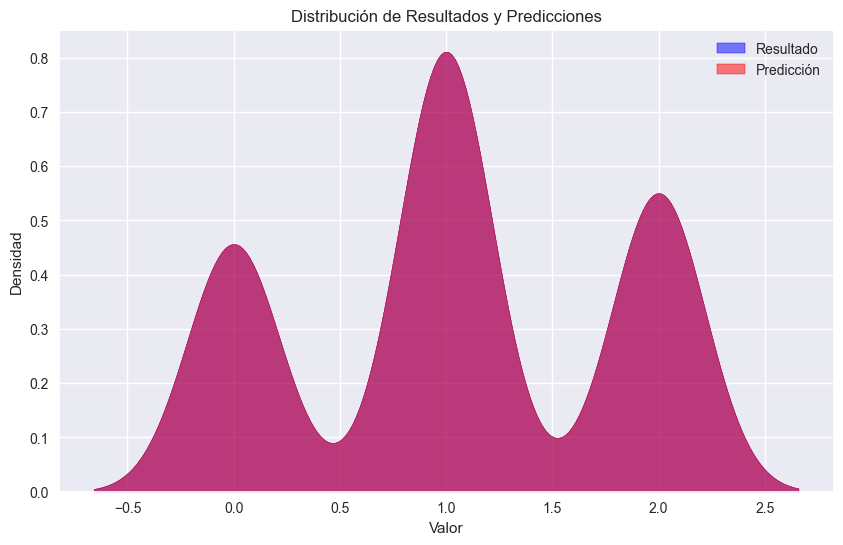

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# Establecer el estilo de Seaborn
sns.set_style("darkgrid")

# Crear subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la distribución de 'resultado' y 'prediccion' con transparencia
sns.kdeplot(tabla_completa['resultado'], color='blue', label='Resultado', ax=ax, alpha=0.5, fill=True)
sns.kdeplot(predictions['prediction_label'].astype(float), color='red', label='Predicción', ax=ax, alpha=0.5, fill=True)

# Configuración de leyendas y etiquetas
plt.title('Distribución de Resultados y Predicciones')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

In [47]:
nombre_modelo = 'boosted_my_best_pipeline'
save_model(boosted, nombre_modelo)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['num_partido', 'GFc', 'PAc', 'PDc',
                                              'GFv', 'PAv', 'PDv', 'gc', 'gv',
                                              'win_pctC', 'WINPCTC_prediccion',
                                              'prob_localpoisson',
                                              'prob_empatepoisson',
                                              'prob_visitantepoisson', 'PROB'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_e...
                                                                     class_weight=None,
               

In [48]:
import pandas as pd
from pycaret.classification import load_model, predict_model

# Cargar el modelo
nombre_modelo = 'boosted_my_best_pipeline'
modelo = load_model(nombre_modelo)

# Crear columna para almacenar aciertos
data['acierto'] = 0

# Dividir el dataFrame en bloques de 100 partidos
bloques = [data[i:i+500] for i in range(0, len(data), 500)]

# Iterar sobre cada bloque y acumular aciertos
for bloque in bloques:
    # Hacer predicciones
    predicciones = predict_model(modelo, data=bloque)
    
    # Comparar predicciones con resultados reales y registrar aciertos
    bloque['acierto'] = (predicciones['prediction_label'] == bloque['resultado']).astype(int)
    
    # Actualizar los aciertos en el dataFrame original
    data.loc[bloque.index, 'acierto'] = bloque['acierto']

# Calcular el porcentaje total de aciertos por liga
porcentaje_aciertos_por_liga = data.groupby('LIGA')['acierto'].mean() * 100

# Mostrar resultados
print("Porcentaje total de aciertos por liga:")
print(porcentaje_aciertos_por_liga)

# Opcional: guardar los resultados en un archivo
#porcentaje_aciertos_por_liga.to_csv("porcentaje_aciertos_por_liga.csv", index=True)


Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Porcentaje total de aciertos por liga:
LIGA
POR    100.0
Name: acierto, dtype: float64


In [49]:
proximos = pd.read_excel("ligas_NUEVASconsolidadas.xlsx", sheet_name= 'Hoja2')
proximos = proximos.dropna(subset=["bookmaker1"])
proximos["CASA"] = proximos["CASA"].str.replace(" ", "")
proximos["VISITA"] = proximos["VISITA"].str.replace(" ", "")

numero_ligas = proximos['LIGA'].nunique()
# Suponiendo que "liga_esp" es tu DataFrame

proximos.reset_index(drop=True, inplace=True)
display(numero_ligas)
display(proximos)

8

,num_partido,LIGA,CASA,VISITA,bookmaker1,bookmakerX,bookmaker2,"<2,5",">2,5"
0,1,ESP,Valencia,RealMadrid,7.25,4.90,1.39,NaN,NaN
1,2,ESP,RayoVallecano,Celta,2.88,3.09,2.57,NaN,NaN
2,3,ESP,DeportivoAlavÃ©s,Girona,2.80,3.18,2.58,NaN,NaN
3,4,ESP,RealValladolid,RealBetis,4.34,3.67,1.79,NaN,NaN
4,5,ESP,Espanyol,Leganes,1.96,3.13,4.33,NaN,NaN
5,6,ESP,Sevilla,Valencia,1.97,3.31,3.99,NaN,NaN
6,7,ESP,LasPalmas,Getafe,2.39,3.03,3.21,NaN,NaN
7,8,ESP,AtlÃ©tico,Osasuna,1.31,4.93,10.42,NaN,NaN
8,9,ESP,RealSociedad,Villarreal,1.74,3.73,4.62,NaN,NaN
9,10,FR,SaintEtienne,StadedeReims,3.58,3.36,2.07,NaN,NaN


In [50]:
pronosticook = proximos.drop(['bookmaker1', 'bookmakerX', 'bookmaker2','<2,5','>2,5'], axis=1)

display(pronosticook)

,num_partido,LIGA,CASA,VISITA
0,1,ESP,Valencia,RealMadrid
1,2,ESP,RayoVallecano,Celta
2,3,ESP,DeportivoAlavÃ©s,Girona
3,4,ESP,RealValladolid,RealBetis
4,5,ESP,Espanyol,Leganes
5,6,ESP,Sevilla,Valencia
6,7,ESP,LasPalmas,Getafe
7,8,ESP,AtlÃ©tico,Osasuna
8,9,ESP,RealSociedad,Villarreal
9,10,FR,SaintEtienne,StadedeReims


In [ ]:
pronosticook = pronosticook.merge(liga_espcasa_visita[['GFc','PAc', 'PDc']], left_on='CASA', right_index=True)

pronosticook

,num_partido,LIGA,CASA,VISITA,GFc,PAc,PDc
47,48,POR,Moreirense,AVSFutevol,1.250000,0.904298,0.883303
48,49,POR,Benfica,SportingBraga,2.960000,2.141379,0.326143
49,50,POR,Boavista,Arouca,0.916667,0.663152,1.324954
50,51,POR,CDSantaClara,Farense,1.000000,0.723439,0.698877
51,52,POR,CasaPiaAC,FamalicÃ£o,0.800000,0.578751,0.847971
52,53,POR,EstreladaAmadora,Estoril,1.260870,0.912162,1.276210
53,54,POR,GilVicente,RioAve,1.625000,1.175588,0.951249


In [52]:
pronosticook = pd.merge(pronosticook, liga_espcasa_visita[['GFv','PAv','PDv']], left_on='VISITA', right_index=True)
pronosticook

,num_partido,LIGA,CASA,VISITA,GFc,PAc,PDc,GFv,PAv,PDv
47,48,POR,Moreirense,AVSFutevol,1.250000,0.904298,0.883303,0.400000,0.326143,0.723439
48,49,POR,Benfica,SportingBraga,2.960000,2.141379,0.326143,2.000000,1.630713,0.994728
49,50,POR,Boavista,Arouca,0.916667,0.663152,1.324954,1.333333,1.087142,1.175588
50,51,POR,CDSantaClara,Farense,1.000000,0.723439,0.698877,1.080000,0.880585,1.099627
51,52,POR,CasaPiaAC,FamalicÃ£o,0.800000,0.578751,0.847971,1.166667,0.951249,0.904298
52,53,POR,EstreladaAmadora,Estoril,1.260870,0.912162,1.276210,1.166667,0.951249,1.597594
53,54,POR,GilVicente,RioAve,1.625000,1.175588,0.951249,0.640000,0.521828,1.157502


In [53]:
pronosticook['gc']=pronosticook['GFc']*(((pronosticook['PAc'])*(pronosticook['PDv'])))
pronosticook['gv']=pronosticook['GFv']*(((pronosticook['PAv'])*(pronosticook['PDc'])))
pronosticook['win_pctC']=pronosticook['gc']/(((pronosticook['gc'])+(pronosticook['gv'])))
pronosticook = pronosticook.sort_values(by="num_partido")

pronosticook[0:10]

,num_partido,LIGA,CASA,VISITA,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv,win_pctC
47,48,POR,Moreirense,AVSFutevol,1.250000,0.904298,0.883303,0.400000,0.326143,0.723439,0.817756,0.115233,0.876490
48,49,POR,Benfica,SportingBraga,2.960000,2.141379,0.326143,2.000000,1.630713,0.994728,6.305067,1.063690,0.855649
49,50,POR,Boavista,Arouca,0.916667,0.663152,1.324954,1.333333,1.087142,1.175588,0.714628,1.920551,0.271188
50,51,POR,CDSantaClara,Farense,1.000000,0.723439,0.698877,1.080000,0.880585,1.099627,0.795513,0.664654,0.544809
51,52,POR,CasaPiaAC,FamalicÃ£o,0.800000,0.578751,0.847971,1.166667,0.951249,0.904298,0.418691,0.941070,0.307915
52,53,POR,EstreladaAmadora,Estoril,1.260870,0.912162,1.276210,1.166667,0.951249,1.597594,1.837420,1.416326,0.564709
53,54,POR,GilVicente,RioAve,1.625000,1.175588,0.951249,0.640000,0.521828,1.157502,2.211211,0.317689,0.874377


In [54]:
# Definir una función para calcular 'gc' utilizando los parámetros ajustados
def calcular_gc(c):
    return funcion_lineal(c, *parametros_gc)

# Definir una función para calcular 'gv' utilizando los parámetros ajustados
def calcular_gv(v):
    return funcion_lineal(v, *parametros_gv)

# Aplicar las funciones para calcular 'gc' y 'gv' a la tabla pronosticook
pronosticook['gc'] = pronosticook['GFc'] * (pronosticook['PAc'] * pronosticook['PDv']) + ventaja_casa
pronosticook['gv'] = pronosticook['GFv'] * (pronosticook['PAv'] * pronosticook['PDc'])

# Imprimir la tabla pronosticook con los valores de 'gc' y 'gv' calculados
print(pronosticook)

    num_partido LIGA              CASA         VISITA       GFc       PAc  \
47           48  POR        Moreirense     AVSFutevol  1.250000  0.904298   
48           49  POR           Benfica  SportingBraga  2.960000  2.141379   
49           50  POR          Boavista         Arouca  0.916667  0.663152   
50           51  POR      CDSantaClara        Farense  1.000000  0.723439   
51           52  POR         CasaPiaAC     FamalicÃ£o  0.800000  0.578751   
52           53  POR  EstreladaAmadora        Estoril  1.260870  0.912162   
53           54  POR        GilVicente         RioAve  1.625000  1.175588   

         PDc       GFv       PAv       PDv        gc        gv  win_pctC  
47  0.883303  0.400000  0.326143  0.723439  0.973585  0.115233  0.876490  
48  0.326143  2.000000  1.630713  0.994728  6.460896  1.063690  0.855649  
49  1.324954  1.333333  1.087142  1.175588  0.870457  1.920551  0.271188  
50  0.698877  1.080000  0.880585  1.099627  0.951342  0.664654  0.544809  
51  0.84

In [55]:
pronosticook['WINPCTC_prediccion'] = np.where(pronosticook['win_pctC'] >umbral_pctC_opt,1,
                                         np.where(abs(abs(pronosticook['gc']) - abs(pronosticook['gv'])) < umbral_gc_gv_opt, 0, 2))

display(pronosticook[0:10])

,num_partido,LIGA,CASA,VISITA,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv,win_pctC,WINPCTC_prediccion
47,48,POR,Moreirense,AVSFutevol,1.250000,0.904298,0.883303,0.400000,0.326143,0.723439,0.973585,0.115233,0.876490,1
48,49,POR,Benfica,SportingBraga,2.960000,2.141379,0.326143,2.000000,1.630713,0.994728,6.460896,1.063690,0.855649,1
49,50,POR,Boavista,Arouca,0.916667,0.663152,1.324954,1.333333,1.087142,1.175588,0.870457,1.920551,0.271188,2
50,51,POR,CDSantaClara,Farense,1.000000,0.723439,0.698877,1.080000,0.880585,1.099627,0.951342,0.664654,0.544809,0
51,52,POR,CasaPiaAC,FamalicÃ£o,0.800000,0.578751,0.847971,1.166667,0.951249,0.904298,0.574521,0.941070,0.307915,0
52,53,POR,EstreladaAmadora,Estoril,1.260870,0.912162,1.276210,1.166667,0.951249,1.597594,1.993250,1.416326,0.564709,1
53,54,POR,GilVicente,RioAve,1.625000,1.175588,0.951249,0.640000,0.521828,1.157502,2.367041,0.317689,0.874377,1


In [56]:
from scipy.stats import poisson

# Valores esperados de los equipos
lambda1 = pronosticook['gc']
lambda2 = pronosticook['gv']

# Generación de la matriz de probabilidades de Poisson
matriz_poisson = [[poisson.pmf(i, lambda1) * poisson.pmf(j, lambda2) for j in range(0, 10)] for i in range(0, 10)]

In [57]:
# Definir función para calcular la probabilidad Poisson
def poisson_prob(k, lamb):
    return (lamb ** k) * np.exp(-lamb) / np.math.factorial(k)

# Iterar sobre las filas de la tabla pronosticook y calcular las probabilidades
for index, row in pronosticook.iterrows():
    lambda_local = row['gc']
    lambda_visitante = row['gv']
    pronosticook.loc[index, 'prob_localpoisson'] = sum([poisson_prob(j, lambda_local) * poisson_prob(k, lambda_visitante) for j in range(0, 10) for k in range(0, j)])
    pronosticook.loc[index, 'prob_empatepoisson'] = sum([poisson_prob(j, lambda_local) * poisson_prob(j, lambda_visitante) for j in range(0, 10)])
    pronosticook.loc[index, 'prob_visitantepoisson'] = sum([poisson_prob(j, lambda_local) * poisson_prob(k, lambda_visitante) for j in range(0, 10) for k in range(j+1, 10)])
    if pronosticook[['prob_localpoisson', 'prob_empatepoisson', 'prob_visitantepoisson']].idxmax(axis=1)[index] == 'prob_localpoisson':
        pronosticook.loc[index, 'PROB'] = '1'
    elif pronosticook[['prob_localpoisson', 'prob_empatepoisson', 'prob_visitantepoisson']].idxmax(axis=1)[index] == 'prob_visitantepoisson':
        pronosticook.loc[index, 'PROB'] = '2'
    else:
        pronosticook.loc[index, 'PROB'] = '0'

# Imprimir la tabla actualizada
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pronosticook.head())

,num_partido,LIGA,CASA,VISITA,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv,win_pctC,WINPCTC_prediccion,prob_localpoisson,prob_empatepoisson,prob_visitantepoisson,PROB
47,48,POR,Moreirense,AVSFutevol,1.250000,0.904298,0.883303,0.400000,0.326143,0.723439,0.973585,0.115233,0.876490,1,0.581132,0.375451,0.043417,1
48,49,POR,Benfica,SportingBraga,2.960000,2.141379,0.326143,2.000000,1.630713,0.994728,6.460896,1.063690,0.855649,1,0.853188,0.018277,0.009249,1
49,50,POR,Boavista,Arouca,0.916667,0.663152,1.324954,1.333333,1.087142,1.175588,0.870457,1.920551,0.271188,2,0.164114,0.215662,0.620190,2
50,51,POR,CDSantaClara,Farense,1.000000,0.723439,0.698877,1.080000,0.880585,1.099627,0.951342,0.664654,0.544809,0,0.408545,0.345641,0.245814,1
51,52,POR,CasaPiaAC,FamalicÃ£o,0.800000,0.578751,0.847971,1.166667,0.951249,0.904298,0.574521,0.941070,0.307915,0,0.215974,0.355502,0.428524,2


In [58]:
predictions = predict_model(boosted, data=pronosticook)
predictions.head(20)

,num_partido,LIGA,CASA,VISITA,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv,win_pctC,WINPCTC_prediccion,prob_localpoisson,prob_empatepoisson,prob_visitantepoisson,PROB,prediction_label,prediction_score
47,48,POR,Moreirense,AVSFutevol,1.250000,0.904298,0.883303,0.400000,0.326143,0.723439,0.973585,0.115233,0.876490,1,0.581132,0.375451,0.043417,1,1,0.8
48,49,POR,Benfica,SportingBraga,2.960000,2.141379,0.326143,2.000000,1.630713,0.994728,6.460896,1.063690,0.855649,1,0.853188,0.018277,0.009249,1,1,1.0
49,50,POR,Boavista,Arouca,0.916667,0.663152,1.324954,1.333333,1.087142,1.175588,0.870457,1.920551,0.271188,2,0.164114,0.215662,0.620190,2,2,1.0
50,51,POR,CDSantaClara,Farense,1.000000,0.723439,0.698877,1.080000,0.880585,1.099627,0.951342,0.664654,0.544809,0,0.408545,0.345641,0.245814,1,0,0.7
51,52,POR,CasaPiaAC,FamalicÃ£o,0.800000,0.578751,0.847971,1.166667,0.951249,0.904298,0.574521,0.941070,0.307915,0,0.215974,0.355502,0.428524,2,2,1.0
52,53,POR,EstreladaAmadora,Estoril,1.260870,0.912162,1.276210,1.166667,0.951249,1.597594,1.993250,1.416326,0.564709,1,0.509795,0.216985,0.273173,1,0,1.0
53,54,POR,GilVicente,RioAve,1.625000,1.175588,0.951249,0.640000,0.521828,1.157502,2.367041,0.317689,0.874377,1,0.833988,0.130047,0.035785,1,1,1.0


In [59]:
# Realizar la unión de las tablas utilizando las columnas comunes
resultado = pd.merge(predictions, proximos, on=['num_partido', 'LIGA', 'CASA', 'VISITA'], how='inner')

# Eliminar las columnas 'prob_menos_2.5' y 'prob_mas_2.5' si están presentes
resultado = resultado.drop(columns=['<2,5', '>2,5'], errors='ignore')

# Mostrar la tabla resultante sin las columnas eliminadas
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(resultado.head())

,num_partido,LIGA,CASA,VISITA,GFc,PAc,PDc,GFv,PAv,PDv,gc,gv,win_pctC,WINPCTC_prediccion,prob_localpoisson,prob_empatepoisson,prob_visitantepoisson,PROB,prediction_label,prediction_score,bookmaker1,bookmakerX,bookmaker2
0,48,POR,Moreirense,AVSFutevol,1.250000,0.904298,0.883303,0.400000,0.326143,0.723439,0.973585,0.115233,0.876490,1,0.581132,0.375451,0.043417,1,1,0.8,1.80,3.40,4.36
1,49,POR,Benfica,SportingBraga,2.960000,2.141379,0.326143,2.000000,1.630713,0.994728,6.460896,1.063690,0.855649,1,0.853188,0.018277,0.009249,1,1,1.0,1.39,4.70,6.80
2,50,POR,Boavista,Arouca,0.916667,0.663152,1.324954,1.333333,1.087142,1.175588,0.870457,1.920551,0.271188,2,0.164114,0.215662,0.620190,2,2,1.0,2.72,3.17,2.52
3,51,POR,CDSantaClara,Farense,1.000000,0.723439,0.698877,1.080000,0.880585,1.099627,0.951342,0.664654,0.544809,0,0.408545,0.345641,0.245814,1,0,0.7,1.64,3.40,5.70
4,52,POR,CasaPiaAC,FamalicÃ£o,0.800000,0.578751,0.847971,1.166667,0.951249,0.904298,0.574521,0.941070,0.307915,0,0.215974,0.355502,0.428524,2,2,1.0,2.34,3.02,3.11


In [60]:
resultado['kelly1']= (resultado['bookmaker1']*resultado['prob_localpoisson']-1)/(resultado['bookmaker1']-1)

resultado['kellyx']= (resultado['bookmakerX']*resultado['prob_empatepoisson']-1)/(resultado['bookmakerX']-1)

resultado['kelly2']= (resultado['bookmaker2']*resultado['prob_visitantepoisson']-1)/(resultado['bookmaker2']-1)

resultado

,num_partido,LIGA,CASA,VISITA,GFc,PAc,PDc,GFv,PAv,PDv,...,prob_visitantepoisson,PROB,prediction_label,prediction_score,bookmaker1,bookmakerX,bookmaker2,kelly1,kellyx,kelly2
0,48,POR,Moreirense,AVSFutevol,1.250000,0.904298,0.883303,0.400000,0.326143,0.723439,...,0.043417,1,1,0.8,1.80,3.40,4.36,0.057548,0.115222,-0.241281
1,49,POR,Benfica,SportingBraga,2.960000,2.141379,0.326143,2.000000,1.630713,0.994728,...,0.009249,1,1,1.0,1.39,4.70,6.80,0.476748,-0.247053,-0.161571
2,50,POR,Boavista,Arouca,0.916667,0.663152,1.324954,1.333333,1.087142,1.175588,...,0.620190,2,2,1.0,2.72,3.17,2.52,-0.321866,-0.145784,0.370315
3,51,POR,CDSantaClara,Farense,1.000000,0.723439,0.698877,1.080000,0.880585,1.099627,...,0.245814,1,0,0.7,1.64,3.40,5.70,-0.515602,0.072991,0.085349
4,52,POR,CasaPiaAC,FamalicÃ£o,0.800000,0.578751,0.847971,1.166667,0.951249,0.904298,...,0.428524,2,2,1.0,2.34,3.02,3.11,-0.369120,0.036444,0.157682
5,53,POR,EstreladaAmadora,Estoril,1.260870,0.912162,1.276210,1.166667,0.951249,1.597594,...,0.273173,1,0,1.0,2.26,3.04,3.23,0.120744,-0.166847,-0.052759
6,54,POR,GilVicente,RioAve,1.625000,1.175588,0.951249,0.640000,0.521828,1.157502,...,0.035785,1,1,1.0,2.09,3.18,3.48,0.681683,-0.269014,-0.353012


In [61]:
# filtrar los partidos con predicción local y kelly1 mayor a cero
filtro_local = (resultado['prediction_label'] == 1) & (resultado['kelly1'] > 0)
tabla_local = resultado.loc[filtro_local, ['LIGA','CASA', 'VISITA', 'gc', 'gv', 'prediction_label','prediction_score','prob_localpoisson','bookmaker1', 'kelly1']]
tabla_local.rename(columns={'prob_localpoisson': 'probabilidad','bookmaker1': 'bookmaker', 'kelly1': 'kelly'}, inplace=True)

# filtrar los partidos con predicción visitante y kelly2 mayores a cero
filtro_visitante = (resultado['prediction_label'] == 2) & (resultado['kelly2'] > 0)
tabla_visitante = resultado.loc[filtro_visitante, ['LIGA','CASA', 'VISITA', 'gc', 'gv','prediction_label','prediction_score','prob_visitantepoisson','bookmaker2', 'kelly2']]
tabla_visitante.rename(columns={'prob_visitantepoisson': 'probabilidad','bookmaker2': 'bookmaker', 'kelly2': 'kelly'}, inplace=True)

# filtrar los partidos con predicción empate y kellyx mayores a cero
filtro_empate = (resultado['prediction_label'] == 0) & (resultado['kellyx'] > 0)
tabla_empate = resultado.loc[filtro_empate, ['LIGA','CASA', 'VISITA', 'gc', 'gv','prediction_label','prediction_score','prob_empatepoisson','bookmakerX', 'kellyx']]
tabla_empate.rename(columns={'prob_empatepoisson': 'probabilidad','bookmakerX': 'bookmaker', 'kellyx': 'kelly'}, inplace=True)

# unir las tres tablas en una sola consolidada
tablas = [tabla_local, tabla_visitante, tabla_empate]
partidos_apuestaesp = pd.concat(tablas)

display(partidos_apuestaesp)

,LIGA,CASA,VISITA,gc,gv,prediction_label,prediction_score,probabilidad,bookmaker,kelly
0,POR,Moreirense,AVSFutevol,0.973585,0.115233,1,0.8,0.581132,1.80,0.057548
1,POR,Benfica,SportingBraga,6.460896,1.063690,1,1.0,0.853188,1.39,0.476748
6,POR,GilVicente,RioAve,2.367041,0.317689,1,1.0,0.833988,2.09,0.681683
2,POR,Boavista,Arouca,0.870457,1.920551,2,1.0,0.620190,2.52,0.370315
4,POR,CasaPiaAC,FamalicÃ£o,0.574521,0.941070,2,1.0,0.428524,3.11,0.157682
3,POR,CDSantaClara,Farense,0.951342,0.664654,0,0.7,0.345641,3.40,0.072991


In [62]:
# guardar los resultados en un archivo excel
partidos_apuestaesp.to_excel('apuestasligasBRESPGRHOLTRK.xlsx', index=False)

In [63]:
# Redondear la columna de probabilidades a dos cifras significativas
partidos_apuestas = partidos_apuestaesp.copy()
partidos_apuestas['Probabilidad'] = partidos_apuestas['prediction_score'].round(2)

# Eliminar filas con probabilidad menor a 0.70
partidos_apuestas = partidos_apuestas[partidos_apuestas['prediction_score'] >= 0.50]

# Restablecer el índice del DataFrame después del redondeo y la eliminación
partidos_apuestas.reset_index(drop=True, inplace=True)

# Puedes usar el método dropna() si prefieres eliminar las filas con algún valor NaN después del redondeo
# partidos_apuestas = partidos_apuestas.dropna()

# Mostrar el DataFrame resultante con el índice reseteado
partidos_apuestas

,LIGA,CASA,VISITA,gc,gv,prediction_label,prediction_score,probabilidad,bookmaker,kelly,Probabilidad
0,POR,Moreirense,AVSFutevol,0.973585,0.115233,1,0.8,0.581132,1.80,0.057548,0.8
1,POR,Benfica,SportingBraga,6.460896,1.063690,1,1.0,0.853188,1.39,0.476748,1.0
2,POR,GilVicente,RioAve,2.367041,0.317689,1,1.0,0.833988,2.09,0.681683,1.0
3,POR,Boavista,Arouca,0.870457,1.920551,2,1.0,0.620190,2.52,0.370315,1.0
4,POR,CasaPiaAC,FamalicÃ£o,0.574521,0.941070,2,1.0,0.428524,3.11,0.157682,1.0
5,POR,CDSantaClara,Farense,0.951342,0.664654,0,0.7,0.345641,3.40,0.072991,0.7


In [64]:
# calcular la suma de los kelly para cada liga
suma_kelly = partidos_apuestas.groupby('LIGA')['kelly'].transform('sum')

# crear la nueva columna kelly_relativo
partidos_apuestas['kelly_relativo'] = partidos_apuestas['kelly'] / suma_kelly

# mostrar los resultados
display(partidos_apuestas)

,LIGA,CASA,VISITA,gc,gv,prediction_label,prediction_score,probabilidad,bookmaker,kelly,Probabilidad,kelly_relativo
0,POR,Moreirense,AVSFutevol,0.973585,0.115233,1,0.8,0.581132,1.80,0.057548,0.8,0.031673
1,POR,Benfica,SportingBraga,6.460896,1.063690,1,1.0,0.853188,1.39,0.476748,1.0,0.262387
2,POR,GilVicente,RioAve,2.367041,0.317689,1,1.0,0.833988,2.09,0.681683,1.0,0.375176
3,POR,Boavista,Arouca,0.870457,1.920551,2,1.0,0.620190,2.52,0.370315,1.0,0.203809
4,POR,CasaPiaAC,FamalicÃ£o,0.574521,0.941070,2,1.0,0.428524,3.11,0.157682,1.0,0.086783
5,POR,CDSantaClara,Farense,0.951342,0.664654,0,0.7,0.345641,3.40,0.072991,0.7,0.040172


Resultados por liga:
      Aciertos  Total Predicciones  Porcentaje de aciertos
LIGA                                                      
2.5         11                  19               57.894737
BR          53                  92               57.608696
CRO          1                   2               50.000000
ESP         51                  76               67.105263
FR          30                  57               52.631579
GER         32                  61               52.459016
GR          32                  46               69.565217
HOL         37                  73               50.684932
ING         28                  52               53.846154
ITL         33                  65               50.769231
POR          5                   7               71.428571
RUS         20                  39               51.282051
TRK         46                  86               53.488372


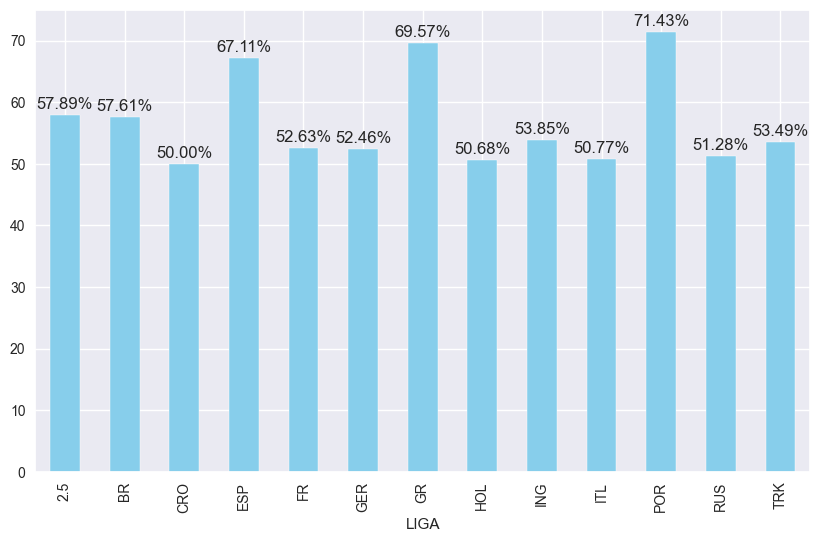

In [65]:
# Especifica la ruta del archivo Excel
archivo_excel = "seguimiento apuestas.xlsx"

# Carga el libro de Excel en un DataFrame de pandas
df = pd.read_excel(archivo_excel)

# Eliminar filas donde 'apuesta_ajustada' es igual a 0
df = df[df['apuesta_ajustada'] != 0]

# Eliminar filas con valores nulos en la columna 'resultado'
df = df.dropna(subset=['resultado'])

# Eliminar filas con valores nulos en la columna 'resultado'
df = df.dropna(subset=['resultado'])

# Calcular aciertos agrupados por la columna 'LIGA'
aciertos_por_liga = df.groupby('LIGA').apply(lambda x: (x['prediction_label'] == x['resultado']).sum())

# Calcular total de predicciones por liga
total_predicciones_por_liga = df.groupby('LIGA').size()

# Calcular porcentaje de aciertos por liga
porcentaje_aciertos_por_liga = (aciertos_por_liga / total_predicciones_por_liga) * 100

# Imprimir resultados por liga
print("Resultados por liga:")
print(pd.DataFrame({'Aciertos': aciertos_por_liga, 'Total Predicciones': total_predicciones_por_liga, 'Porcentaje de aciertos': porcentaje_aciertos_por_liga}))

# Crear un gráfico de barras por liga
plt.figure(figsize=(10, 6))
porcentaje_aciertos_por_liga.plot(kind='bar', color='skyblue')

# Agregar etiquetas a las barras
for i, v in enumerate(porcentaje_aciertos_por_liga):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

In [66]:
# Calcular el total de porcentaje de aciertos
total_porcentaje_aciertos = porcentaje_aciertos_por_liga.sum()
total_porcentaje_aciertos

738.7638193101692

In [67]:
#Dividir el porcentaje de aciertos de cada liga por el total de porcentaje de aciertos
porcentaje_aciertos_relativos = round(porcentaje_aciertos_por_liga / total_porcentaje_aciertos*100 , 0)

# Imprimir resultados por liga con los porcentajes relativos
print("Resultados por liga:")
for liga, porcentaje_acierto in zip(porcentaje_aciertos_por_liga.index, porcentaje_aciertos_relativos):
    print(f"Liga: {liga}, Porcentaje de aciertos relativo: {porcentaje_acierto:.2f}%")

Resultados por liga:
Liga: 2.5, Porcentaje de aciertos relativo: 8.00%
Liga: BR, Porcentaje de aciertos relativo: 8.00%
Liga: CRO, Porcentaje de aciertos relativo: 7.00%
Liga: ESP, Porcentaje de aciertos relativo: 9.00%
Liga: FR, Porcentaje de aciertos relativo: 7.00%
Liga: GER, Porcentaje de aciertos relativo: 7.00%
Liga: GR, Porcentaje de aciertos relativo: 9.00%
Liga: HOL, Porcentaje de aciertos relativo: 7.00%
Liga: ING, Porcentaje de aciertos relativo: 7.00%
Liga: ITL, Porcentaje de aciertos relativo: 7.00%
Liga: POR, Porcentaje de aciertos relativo: 10.00%
Liga: RUS, Porcentaje de aciertos relativo: 7.00%
Liga: TRK, Porcentaje de aciertos relativo: 7.00%


In [68]:
import pandas as pd

# Calcular si la predicción fue correcta
tabla_completa['acierto'] = (tabla_completa['resultado'] == 1).astype(int)

# Agrupar por liga y contar los aciertos
aciertos_por_liga = tabla_completa.groupby('LIGA')['acierto'].sum()
total_aciertos = aciertos_por_liga.sum()

# Calcular el porcentaje de aciertos relativo para cada liga
porcentaje_aciertos_relativos = round(aciertos_por_liga / total_aciertos * 100, 2)

# Definir el BANK y calcular la cantidad total a apostar (la mitad del BANK)
#BANK = 83  # Capital total disponible
cantidad_total_a_apostar = BANK / 2

# Crear un DataFrame para almacenar las proporciones de aciertos
proporcion_apuestas = pd.DataFrame({
    'LIGA': aciertos_por_liga.index,
    'porcentaje_aciertos_relativos': porcentaje_aciertos_relativos
})

# Calcular la cantidad a apostar por liga usando la proporción de aciertos relativos
proporcion_apuestas['cantidad_apuesta_liga'] = cantidad_total_a_apostar * (proporcion_apuestas['porcentaje_aciertos_relativos'] / 100)

# Ordenar el DataFrame por porcentaje de aciertos relativo de mayor a menor
proporcion_apuestas = proporcion_apuestas.sort_values(by='porcentaje_aciertos_relativos', ascending=False)

# Imprimir resultados por liga con las cantidades a apostar
print("Distribución de apuestas por liga:")
for index, row in proporcion_apuestas.iterrows():
    print(f"Liga: {row['LIGA']}, Porcentaje de aciertos relativo: {row['porcentaje_aciertos_relativos']}%, Cantidad a apostar: {row['cantidad_apuesta_liga']:.2f}")


Distribución de apuestas por liga:
Liga: POR, Porcentaje de aciertos relativo: 100.0%, Cantidad a apostar: 34.00


In [69]:
import pandas as pd

# Eliminar filas con valores nulos en la columna 'resultado'
df = df.dropna(subset=['resultado'])

# Calcular si la predicción fue correcta
df['acierto'] = (df['resultado'] == df['prediction_label']).astype(int)

# Agrupar por liga y contar los aciertos
aciertos_por_liga = df.groupby('LIGA')['acierto'].sum()
total_aciertos = aciertos_por_liga.sum()

# Calcular el porcentaje de aciertos relativo para cada liga
porcentaje_aciertos_relativos = round(aciertos_por_liga / total_aciertos * 100, 2)

# Definir el BANK y calcular la cantidad total a apostar (la mitad del BANK)
#BANK = 83  # Capital total disponible
cantidad_total_a_apostar = BANK / 2

# Crear un DataFrame para almacenar las proporciones de aciertos y calcular la cantidad a apostar por liga
proporcion_apuestas_por_liga = pd.DataFrame({
    'LIGA': aciertos_por_liga.index,
    'porcentaje_aciertos_relativos': porcentaje_aciertos_relativos
})

proporcion_apuestas_por_liga['cantidad_apuesta_liga'] = cantidad_total_a_apostar * (proporcion_apuestas_por_liga['porcentaje_aciertos_relativos'] / 100)

# Crear un diccionario para almacenar los resultados por tipo de predicción para cada liga
resultados_por_liga = []

# Iterar sobre cada liga y calcular los aciertos y porcentaje de aciertos por tipo de predicción
for liga in df['LIGA'].unique():
    df_liga = df[df['LIGA'] == liga]
    
    # Calcular los aciertos y total de predicciones por tipo de predicción
    aciertos_por_prediccion = df_liga.groupby('prediction_label').apply(lambda x: (x['prediction_label'] == x['resultado']).sum())
    total_predicciones_por_prediccion = df_liga.groupby('prediction_label').size()
    
    # Calcular el porcentaje de aciertos por tipo de predicción
    porcentaje_aciertos_por_prediccion = (aciertos_por_prediccion / total_predicciones_por_prediccion) * 100
    
    # Obtener la cantidad a apostar para esta liga
    cantidad_apuesta_liga = proporcion_apuestas_por_liga.loc[proporcion_apuestas_por_liga['LIGA'] == liga, 'cantidad_apuesta_liga'].values[0]
    
    # Calcular la cantidad a apostar por tipo de predicción usando la proporción de aciertos por predicción dentro de la liga
    proporcion_apuestas_por_prediccion = (porcentaje_aciertos_por_prediccion / 100) * cantidad_apuesta_liga
    
    # Guardar los resultados en el diccionario de la liga
    resultados = pd.DataFrame({
        'Liga': liga,
        'Aciertos': aciertos_por_prediccion,
        'Total Predicciones': total_predicciones_por_prediccion,
        'Porcentaje de aciertos': porcentaje_aciertos_por_prediccion,
        'Cantidad a apostar por predicción': proporcion_apuestas_por_prediccion
    })
    
    resultados_por_liga.append(resultados)

# Consolidar todos los resultados en un solo DataFrame
resultados_consolidados = pd.concat(resultados_por_liga)

# Mostrar los resultados consolidados
resultados_consolidados


,Liga,Aciertos,Total Predicciones,Porcentaje de aciertos,Cantidad a apostar por predicción
prediction_label,,,,,
1,GER,29,52,55.769231,1.600354
2,GER,3,9,33.333333,0.956533
1,ESP,49,69,71.014493,3.249907
2,ESP,2,7,28.571429,1.307543
0,FR,0,1,0.000000,0.000000
1,FR,16,31,51.612903,1.389832
2,FR,14,25,56.000000,1.507968
0,GR,0,1,0.000000,0.000000
1,GR,18,28,64.285714,1.844743


In [70]:
partidos_apuestas

,LIGA,CASA,VISITA,gc,gv,prediction_label,prediction_score,probabilidad,bookmaker,kelly,Probabilidad,kelly_relativo
0,POR,Moreirense,AVSFutevol,0.973585,0.115233,1,0.8,0.581132,1.80,0.057548,0.8,0.031673
1,POR,Benfica,SportingBraga,6.460896,1.063690,1,1.0,0.853188,1.39,0.476748,1.0,0.262387
2,POR,GilVicente,RioAve,2.367041,0.317689,1,1.0,0.833988,2.09,0.681683,1.0,0.375176
3,POR,Boavista,Arouca,0.870457,1.920551,2,1.0,0.620190,2.52,0.370315,1.0,0.203809
4,POR,CasaPiaAC,FamalicÃ£o,0.574521,0.941070,2,1.0,0.428524,3.11,0.157682,1.0,0.086783
5,POR,CDSantaClara,Farense,0.951342,0.664654,0,0.7,0.345641,3.40,0.072991,0.7,0.040172


In [71]:
import pandas as pd

def asignar_cantidad_apuesta(partidos_apuestas, resultados_consolidados):
    # Asegurarse de que el índice de resultados_consolidados esté en formato adecuado
    resultados_consolidados.reset_index(inplace=True)
    
    # Crear una nueva columna en partidos_apuestas para la cantidad a apostar
    partidos_apuestas['Cantidad a apostar por predicción'] = 0.0

    # Iterar sobre cada fila de partidos_apuestas
    for i, fila in partidos_apuestas.iterrows():
        liga = fila['LIGA']
        prediction_label = fila['prediction_label']

        # Buscar la cantidad a apostar correspondiente en resultados_consolidados
        cantidad_apuesta = resultados_consolidados[
            (resultados_consolidados['Liga'] == liga) & 
            (resultados_consolidados['prediction_label'] == prediction_label)
        ]['Cantidad a apostar por predicción']

        # Asignar el valor encontrado a la columna correspondiente
        if not cantidad_apuesta.empty:
            partidos_apuestas.at[i, 'Cantidad a apostar por predicción'] = cantidad_apuesta.values[0]

    return partidos_apuestas

# Ejemplo de uso
# partidos_apuestas es tu DataFrame con los partidos donde quieres asignar las cantidades
# resultados_consolidados es el DataFrame con los resultados consolidados
partidos_apuestas = asignar_cantidad_apuesta(partidos_apuestas, resultados_consolidados)

# Mostrar el DataFrame actualizado
partidos_apuestas


,LIGA,CASA,VISITA,gc,gv,prediction_label,prediction_score,probabilidad,bookmaker,kelly,Probabilidad,kelly_relativo,Cantidad a apostar por predicción
0,POR,Moreirense,AVSFutevol,0.973585,0.115233,1,0.8,0.581132,1.80,0.057548,0.8,0.031673,0.1496
1,POR,Benfica,SportingBraga,6.460896,1.063690,1,1.0,0.853188,1.39,0.476748,1.0,0.262387,0.1496
2,POR,GilVicente,RioAve,2.367041,0.317689,1,1.0,0.833988,2.09,0.681683,1.0,0.375176,0.1496
3,POR,Boavista,Arouca,0.870457,1.920551,2,1.0,0.620190,2.52,0.370315,1.0,0.203809,0.4488
4,POR,CasaPiaAC,FamalicÃ£o,0.574521,0.941070,2,1.0,0.428524,3.11,0.157682,1.0,0.086783,0.4488
5,POR,CDSantaClara,Farense,0.951342,0.664654,0,0.7,0.345641,3.40,0.072991,0.7,0.040172,0.0000


# Calcular si la predicción fue correcta
tabla_completa['acierto'] = (tabla_completa['resultado'] == 1).astype(int)

# Agrupar por liga y contar los aciertos
aciertos_por_liga = tabla_completa.groupby('LIGA')['acierto'].sum()
total_aciertos = aciertos_por_liga.sum()

# Calcular la proporción de aciertos para cada liga
#proporcion_aciertos = aciertos_por_liga / total_aciertos

# Definir el BANK y número de ligas
BANK = 83  # Capital total disponible
numero_ligas = len(aciertos_por_liga)


# Calcular la cantidad total a apostar (la mitad del BANK)
cantidad_total_a_apostar = BANK / 2

# Crear un DataFrame para almacenar las proporciones de aciertos
proporcion_apuestas = pd.DataFrame({
    'LIGA': aciertos_por_liga.index,
    'proporcion_aciertos': proporcion_aciertos
})

# Calcular la cantidad a apostar por liga usando la proporción de aciertos
proporcion_apuestas['cantidad_apuesta_liga'] = cantidad_total_a_apostar * proporcion_apuestas['proporcion_aciertos']

# Ordenar el DataFrame por proporción de aciertos de mayor a menor
proporcion_apuestas = proporcion_apuestas.sort_values(by='proporcion_aciertos', ascending=False)



proporcion_apuestas

In [72]:
# Asegúrate de que 'LIGA' sea una columna y no un índice
partidos_apuestas = partidos_apuestas.reset_index(drop=True)
proporcion_apuestas = proporcion_apuestas.reset_index(drop=True)

# Unir la información de apuestas por liga con los partidos
partidos_con_apuestas = partidos_apuestas#.merge(proporcion_apuestas, on='LIGA', how='left')

# Distribuir la cantidad a apostar por liga entre los partidos de cada liga usando la función de Kelly
partidos_con_apuestas['cantidad_apuesta'] = partidos_con_apuestas['Cantidad a apostar por predicción'] * partidos_con_apuestas['kelly_relativo']

# Mostrar el resultado final
partidos_con_apuestas

,LIGA,CASA,VISITA,gc,gv,prediction_label,prediction_score,probabilidad,bookmaker,kelly,Probabilidad,kelly_relativo,Cantidad a apostar por predicción,cantidad_apuesta
0,POR,Moreirense,AVSFutevol,0.973585,0.115233,1,0.8,0.581132,1.80,0.057548,0.8,0.031673,0.1496,0.004738
1,POR,Benfica,SportingBraga,6.460896,1.063690,1,1.0,0.853188,1.39,0.476748,1.0,0.262387,0.1496,0.039253
2,POR,GilVicente,RioAve,2.367041,0.317689,1,1.0,0.833988,2.09,0.681683,1.0,0.375176,0.1496,0.056126
3,POR,Boavista,Arouca,0.870457,1.920551,2,1.0,0.620190,2.52,0.370315,1.0,0.203809,0.4488,0.091470
4,POR,CasaPiaAC,FamalicÃ£o,0.574521,0.941070,2,1.0,0.428524,3.11,0.157682,1.0,0.086783,0.4488,0.038948
5,POR,CDSantaClara,Farense,0.951342,0.664654,0,0.7,0.345641,3.40,0.072991,0.7,0.040172,0.0000,0.000000


In [73]:
# Filtrar las filas en las que "cantidad_apuesta" sea mayor o igual a 0.5
#partidos_filtrados = partidos_con_apuestas[partidos_con_apuestas['cantidad_apuesta'] >= 0.5]

partidos_filtrados= partidos_con_apuestas
partidos_filtrados

,LIGA,CASA,VISITA,gc,gv,prediction_label,prediction_score,probabilidad,bookmaker,kelly,Probabilidad,kelly_relativo,Cantidad a apostar por predicción,cantidad_apuesta
0,POR,Moreirense,AVSFutevol,0.973585,0.115233,1,0.8,0.581132,1.80,0.057548,0.8,0.031673,0.1496,0.004738
1,POR,Benfica,SportingBraga,6.460896,1.063690,1,1.0,0.853188,1.39,0.476748,1.0,0.262387,0.1496,0.039253
2,POR,GilVicente,RioAve,2.367041,0.317689,1,1.0,0.833988,2.09,0.681683,1.0,0.375176,0.1496,0.056126
3,POR,Boavista,Arouca,0.870457,1.920551,2,1.0,0.620190,2.52,0.370315,1.0,0.203809,0.4488,0.091470
4,POR,CasaPiaAC,FamalicÃ£o,0.574521,0.941070,2,1.0,0.428524,3.11,0.157682,1.0,0.086783,0.4488,0.038948
5,POR,CDSantaClara,Farense,0.951342,0.664654,0,0.7,0.345641,3.40,0.072991,0.7,0.040172,0.0000,0.000000


partidos_apuestas['cantidad_apuesta']= ((BANK/2)/numero_ligas)*partidos_apuestas['kelly_relativo']

display(partidos_apuestas)

# Filtra las filas en las que "cantidad_apuesta" sea mayor o igual a 0.5.
partidos_apuestas = partidos_apuestas[partidos_apuestas['cantidad_apuesta'] >= 0.5]

# Recalcula la columna "cantidad_apuesta" con los partidos que quedan.
partidos_apuestas['cantidad_apuesta'] = ((BANK / 2) / numero_ligas) * partidos_apuestas['kelly_relativo']

# Muestra el DataFrame resultante.
display(partidos_apuestas)

In [74]:
partidos_apuestas= partidos_filtrados

In [75]:
# Función para calcular la apuesta ajustada
def calcular_apuesta_ajustada(cantidad):
    if cantidad < 0.2:
        return 0
    elif cantidad >= 0.2 and cantidad < 0.6:
        return 0.5    
    elif cantidad >= 0.6 and cantidad < 2:
        return 1
    else:
        return 2

# Aplicar la función para crear la columna "apuesta ajustada"
partidos_apuestas['apuesta_ajustada'] = partidos_apuestas['cantidad_apuesta'].apply(calcular_apuesta_ajustada)

# Mostrar el DataFrame resultante
partidos_apuestas.tail(30)

,LIGA,CASA,VISITA,gc,gv,prediction_label,prediction_score,probabilidad,bookmaker,kelly,Probabilidad,kelly_relativo,Cantidad a apostar por predicción,cantidad_apuesta,apuesta_ajustada
0,POR,Moreirense,AVSFutevol,0.973585,0.115233,1,0.8,0.581132,1.80,0.057548,0.8,0.031673,0.1496,0.004738,0
1,POR,Benfica,SportingBraga,6.460896,1.063690,1,1.0,0.853188,1.39,0.476748,1.0,0.262387,0.1496,0.039253,0
2,POR,GilVicente,RioAve,2.367041,0.317689,1,1.0,0.833988,2.09,0.681683,1.0,0.375176,0.1496,0.056126,0
3,POR,Boavista,Arouca,0.870457,1.920551,2,1.0,0.620190,2.52,0.370315,1.0,0.203809,0.4488,0.091470,0
4,POR,CasaPiaAC,FamalicÃ£o,0.574521,0.941070,2,1.0,0.428524,3.11,0.157682,1.0,0.086783,0.4488,0.038948,0
5,POR,CDSantaClara,Farense,0.951342,0.664654,0,0.7,0.345641,3.40,0.072991,0.7,0.040172,0.0000,0.000000,0


In [76]:
sumatoria_apuesta_ajustada = partidos_apuestas['apuesta_ajustada'].sum()
print(sumatoria_apuesta_ajustada)

0


In [77]:
import os 

nombre_liga = liga_esp['LIGA'].iloc[0]  # Obtener el nombre de la liga seleccionada

# Ruta de la carpeta donde se guardará el archivo
ruta_carpeta = r"C:\Users\David Pineda\Desktop\backup2023\modelos deportivos\apuestas\modelo machine sport\nuevo modelo\PRUEBA\FUTBOL\OK\NUEVO\seguimiento_apuestas"

# Crear el nombre del archivo dinámicamente
nombre_archivo = f"seguimiento_apuestas_{nombre_liga}.xlsx"

# Combinar la ruta con el nombre del archivo
ruta_completa = os.path.join(ruta_carpeta, nombre_archivo)

# Guardar el archivo
partidos_apuestas.to_excel(ruta_completa, index=False)

print(f"Archivo guardado como: {ruta_completa}")

# Nombre del archivo para JSON
nombre_archivo_json = f'seguimiento_apuestasNUEVAS.json'
partidos_apuestas.to_json(nombre_archivo_json, orient='records', lines=True)

# Guardar en HTML
nombre_archivo_html = 'seguimiento_apuestasNUEVAS.html'
partidos_apuestas.to_html(nombre_archivo_html, index=False, classes='table table-striped')

Archivo guardado como: C:\Users\David Pineda\Desktop\backup2023\modelos deportivos\apuestas\modelo machine sport\nuevo modelo\PRUEBA\FUTBOL\OK\NUEVO\seguimiento_apuestas\seguimiento_apuestas_POR.xlsx


In [78]:
import pandas as pd

# Eliminar columnas no deseadas
columnas_eliminar = ['prediction_score', 'probabilidad', 'Probabilidad', 'kelly_relativo', 'Cantidad a apostar por predicción', 'cantidad_apuesta', 'apuesta_ajustada']
partidos_apuestas_filtrado = partidos_apuestas.drop(columns=columnas_eliminar)

# Redondear las columnas 'gc' y 'gv' a dos decimales
partidos_apuestas_filtrado[['gc', 'gv']] = partidos_apuestas_filtrado[['gc', 'gv']].round(2)

# Crear la nueva columna 'prediction' basada en 'prediction_label'
condiciones = [
    partidos_apuestas_filtrado['prediction_label'] == 1,
    partidos_apuestas_filtrado['prediction_label'] == 2,
    partidos_apuestas_filtrado['prediction_label'] == 0
]
valores = [
    partidos_apuestas_filtrado['CASA'],  # Si prediction_label es 1
    partidos_apuestas_filtrado['VISITA'],  # Si prediction_label es 2
    'empate'  # Si prediction_label es 0
]

# Asignar los valores según las condiciones
partidos_apuestas_filtrado['prediction'] = np.select(condiciones, valores)

# Eliminar la columna 'prediction_label'
partidos_apuestas_filtrado = partidos_apuestas_filtrado.drop(columns=['prediction_label'])

# Guardar el DataFrame en formato HTML
partidos_apuestas_filtrado.to_html('partidos_apuestas_filtrado.html', index=False)

print("El DataFrame ha sido guardado en formato HTML.")

# Mostrar el DataFrame filtrado con los valores redondeados
print(partidos_apuestas_filtrado)

El DataFrame ha sido guardado en formato HTML.
  LIGA          CASA         VISITA    gc    gv  bookmaker     kelly  \
0  POR    Moreirense     AVSFutevol  0.97  0.12       1.80  0.057548   
1  POR       Benfica  SportingBraga  6.46  1.06       1.39  0.476748   
2  POR    GilVicente         RioAve  2.37  0.32       2.09  0.681683   
3  POR      Boavista         Arouca  0.87  1.92       2.52  0.370315   
4  POR     CasaPiaAC     FamalicÃ£o  0.57  0.94       3.11  0.157682   
5  POR  CDSantaClara        Farense  0.95  0.66       3.40  0.072991   

   prediction  
0  Moreirense  
1     Benfica  
2  GilVicente  
3      Arouca  
4  FamalicÃ£o  
5      empate  


In [79]:
import pandas as pd
import numpy as np  # Asegúrate de que numpy esté importado

# Eliminar columnas no deseadas
columnas_eliminar = [
    'prediction_score', 
    'probabilidad', 
    'Probabilidad', 
    'kelly_relativo', 
    'Cantidad a apostar por predicción', 
    'cantidad_apuesta'
]
partidos_apuestas_VIP = partidos_apuestas.drop(columns=columnas_eliminar)

# Filtrar filas donde 'apuesta_ajustada' es igual a 0
partidos_apuestas_VIP = partidos_apuestas_VIP[partidos_apuestas_VIP['apuesta_ajustada'] != 0]

# Redondear las columnas 'gc' y 'gv' a dos decimales
partidos_apuestas_VIP[['gc', 'gv']] = partidos_apuestas_VIP[['gc', 'gv']].round(2)

# Definir condiciones y valores para la nueva columna 'prediction'
condiciones = [
    partidos_apuestas_VIP['prediction_label'] == 1,
    partidos_apuestas_VIP['prediction_label'] == 2,
    partidos_apuestas_VIP['prediction_label'] == 0
]
valores = [
    partidos_apuestas_VIP['CASA'],  # Si prediction_label es 1
    partidos_apuestas_VIP['VISITA'],  # Si prediction_label es 2
    'empate'  # Si prediction_label es 0
]

# Asignar la nueva columna 'prediction' usando np.select()
partidos_apuestas_VIP['prediction'] = np.select(condiciones, valores, default=np.nan)  # Asigna NaN si no hay coincidencias

# Eliminar la columna 'prediction_label'
if 'prediction_label' in partidos_apuestas_VIP.columns:
    partidos_apuestas_VIP = partidos_apuestas_VIP.drop(columns=['prediction_label'])

# Guardar el DataFrame en formato HTML
partidos_apuestas_VIP.to_html('partidos_apuestas_VIP.html', index=False)

print("El DataFrame ha sido guardado en formato HTML.")

# Mostrar el DataFrame filtrado con los valores redondeados
print(partidos_apuestas_VIP)


El DataFrame ha sido guardado en formato HTML.
Empty DataFrame
Columns: [LIGA, CASA, VISITA, gc, gv, bookmaker, kelly, apuesta_ajustada, prediction]
Index: []
